In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Data collection and  Data processing

In [50]:
sonar_data = pd.read_csv(r"D:\My Research\Rock Vs Mine Prediction\sonar data.csv", header = None)

In [52]:
sonar_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [54]:
sonar_data.shape

(208, 61)

In [56]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [58]:
X = sonar_data.drop(columns=60, axis = 1)
Y = sonar_data[60]

In [60]:
Y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [62]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


# Training and testing the data

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (187, 60) (21, 60)


# Model Training 

In [70]:
model = LogisticRegression()

In [72]:
# Training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

In [75]:
# Accuracy on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [77]:
print("Accuracy on the Training Data: ", training_data_accuracy)

Accuracy on the Training Data:  0.8342245989304813


In [79]:
# Accuracy on the test data
X_test_prediction = model.predict(X_test)
testing_data_prediction = accuracy_score(X_test_prediction, Y_test)

# Making a Predictive system

In [81]:
print("Accuracy on the testing data: ", testing_data_prediction)

Accuracy on the testing data:  0.7619047619047619


In [84]:
input_data = [0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044]
input_data_as_numpy_array = np.asarray(input_data)
# reshaping the array as we are predicitng for one instance
reshaped_input_data_as_numpy_array = input_data_as_numpy_array.reshape(1,-1)


In [86]:
prediction = model.predict(reshaped_input_data_as_numpy_array)
print(prediction)
if (prediction[0] == "R"):
    print("The particle is a ROCK")
else:
    print("The Particle is a MINE")



['R']
The particle is a ROCK


In [96]:
import joblib
joblib.dump(model, "sonar_model.pkl")  # save in current folder or specify folder
print("Model saved successfully!")


Model saved successfully!


In [100]:
import joblib
model = joblib.load(r"D:\My Research\Rock Vs Mine Prediction\sonar_model.pkl")


In [102]:
import numpy as np
sample_input = np.random.rand(60).reshape(1, -1)
prediction = model.predict(sample_input)
print("Prediction:", "Mine" if prediction[0]=='M' else "Rock")


Prediction: Mine


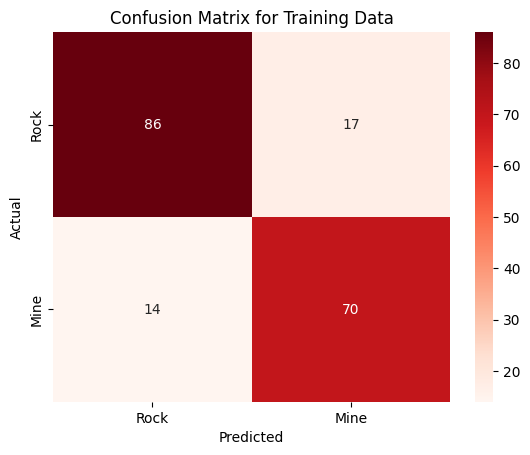

In [122]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(X_train_prediction, Y_train)

# Plot heatmap
sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds', xticklabels=['Rock','Mine'], yticklabels=['Rock','Mine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Training Data')
plt.show()

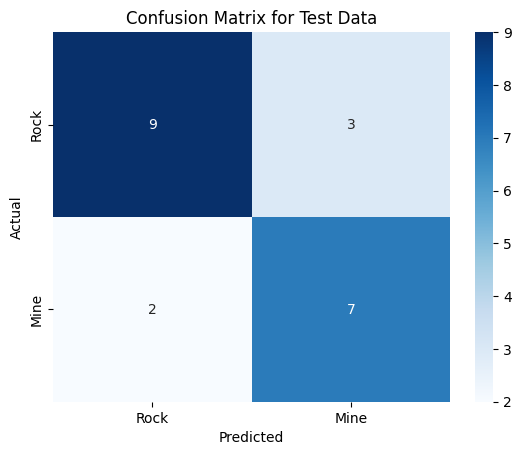

In [126]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(X_test_prediction, Y_test)

# Plot heatmap
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock','Mine'], yticklabels=['Rock','Mine'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Data')
plt.show()